In [16]:
from IPython.display import display
import sympy as spy
spy.init_printing()

In [25]:
Re, Rb, Rc, Ve, Vin, Vbeon, Vb, Vc = spy.symbols('R_e R_b R_c V_e V_{in} V_{beON} V_b V_c', real = True, positive = True)
beta = spy.symbols(r'\beta', real = True, positive = True)

exp = (Vin-Ve-Vbeon)*(1+beta)*Re/Rb - Ve
Ve = spy.solve(exp, Ve)[0]
Vb = (Ve + Vbeon).simplify()

In [63]:
subs = [(Vbeon, 0.7), (beta, 100), (Rb, 1e3), (Re, 3.3e3), (Rc, 4.7e3), (Vcesat, 0.2)]
display(Ve.subs(subs))

In [43]:
exp = beta*(Vin-Vb)/Rb - (10-Vc)/Rc
Vc = spy.solve(exp, Vc)[0].simplify()

In [46]:
((Vin - Vb)/Rb).subs(subs)

In [48]:
(Ve/Re).subs(subs)

In [50]:
((10-Vc)/Rc).subs(subs)

In [59]:
Vce = (Vc-Ve).simplify()
spy.solve(Vce - 0.2, Vin)[0].subs(subs)

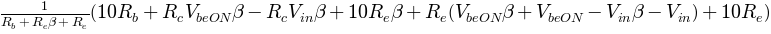

In [57]:
display(Vce)

In [77]:
Re, Rb, Rc, Ve, Vin, Vbeon, Vb, Vc, Vcesat = spy.symbols('R_e R_b R_c V_e V_{in} V_{beON} V_b V_c V_{CESAT}', real = True, positive = True)

Ib = (Vin - Vbeon - Ve)/Rb
Ic = (10 - Vcesat - Ve)/Rc
Ie = Ve/Re

In [78]:
Ve = spy.solve(Ib + Ic - Ie, Ve)[0].simplify().subs(subs)
Vb = Vbeon + Ve
Vc = Vcesat + Ve

In [79]:
Ib = (Vin - Vb)/Rb
Ic = (10 - Vc)/Rc
Ie = Ve/Re

In [80]:
display(Ib.subs(subs))
display(Ic.subs(subs))
display(Ie.subs(subs))

In [84]:
spy.solve(Ib*beta - Ic, Vin)[0].subs(subs)